# Still on the matter

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [7]:
train.isnull().mean().sort_values(ascending = False) *100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

We have missing values in the training dataset.

'Cabin' has over 77% missing values.

'Age' has over 19% missing values

'Embarked' has over 0.2% missing values

In [8]:
test.isnull().mean().sort_values(ascending = False)*100

Cabin          78.229665
Age            20.574163
Fare            0.239234
Embarked        0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
PassengerId     0.000000
dtype: float64

In [9]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

# Visualisation

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart for Categorical Feature

- Pclass
- Sex
- SibSP (# of siblings and spouse)
- Parch (# of parents and children)
- Embarked
- Cabin

In [11]:
def barplot(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    
    dead = train[train['Survived']==0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead'] # Dataframe index, that's why you have it on the x-axis else it would have been 'sex'
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

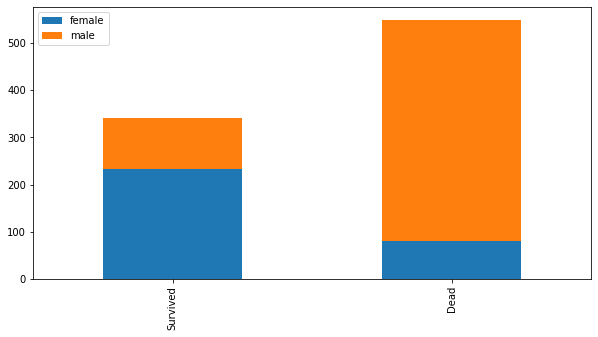

In [12]:
barplot('Sex')

<b>  ==>  It appears Females are more likely to survive

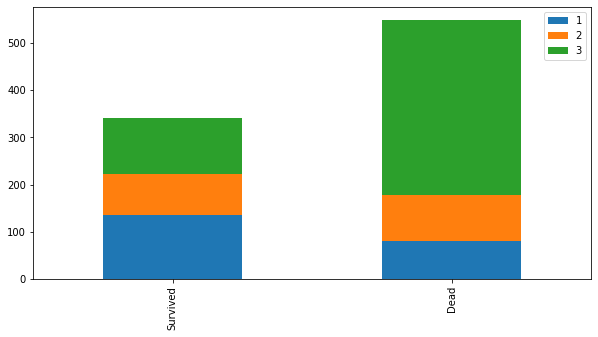

In [13]:
barplot('Pclass')

===>>>  <b>1st class</b> folks are most likely to survive. 

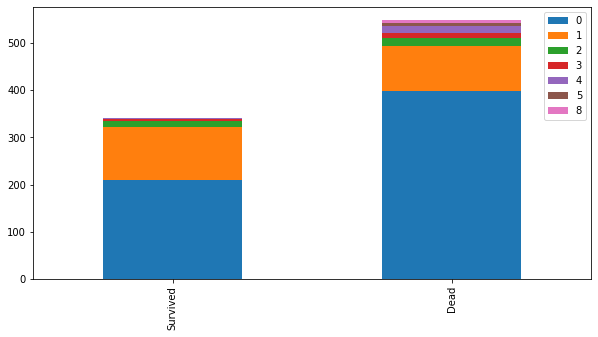

In [14]:
barplot('SibSp')

<b>A person aboarded with more than 2 siblings or spouse is mostly to survive.

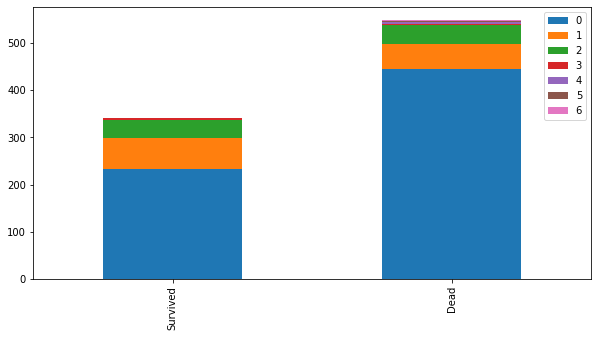

In [15]:
barplot('Parch')

In [16]:
train[['Parch','Survived']].groupby(['Parch'] ,as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


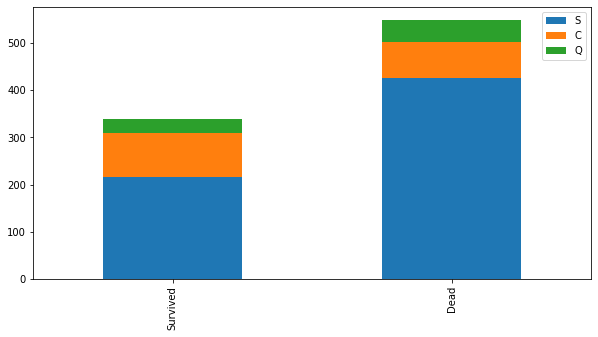

In [17]:
barplot('Embarked')

<b>The Chart confirms a person aboarded from C slightly most likely to survive

# Feature Engineering

Feature engineering is the process of using domain knowledge of data to create features (<b>feature vectors</b>) that make machine learning algoriths work.

## How Titanic Sank?

Titanic sank from the bow of the ship where third class rooms were located.

<b> Conclusion: </b> Pclass is key feature for classifier

### Name

In [18]:
# Combining train and test dataset

train_test_data = [train, test]

In [19]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [20]:
# Extracting the Title

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [21]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Jonkheer      1
Ms            1
Mme           1
Countess      1
Don           1
Sir           1
Lady          1
Name: Title, dtype: int64

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [23]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [24]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

<b> Title map</b>

Mr:     0

Miss:   1

Mrs:    2

Others: 3

In [25]:
train['Title'] = train['Title'].fillna('Mr')

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [27]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [28]:
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Dr':3, 'Rev':3, 'Col':3, 'Major':3, 'Mile':3, 'Countess':3, 'Ms':3, 'Lady':3, 'Jonkheer':3, 'Don':3, 'Dona':3, 'Mme':3, 'Capt':3, 'Sir':3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


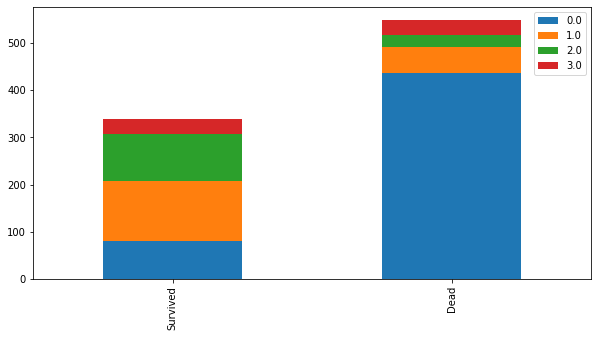

In [30]:
barplot('Title')

In [31]:
# delete unnecessary feture from dataset

train.drop('Name', axis =1, inplace = True)
test.drop('Name', axis =1, inplace = True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [33]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## Sex

### Male: 0 Female: 1

In [34]:
sex_mapping = {'male':0, 'female': 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

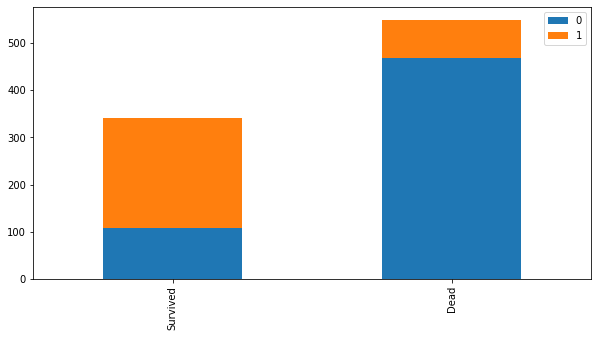

In [35]:
barplot('Sex')

In [36]:
def barplot(feature):
    survived = train[train['Survived']==1][feature].value_counts
    
    df
    df.index()

### Age

We'll use the Title's median age for missing Age

In [37]:
train["Age"].fillna(train.groupby("Title")["Age"].transform('median'), inplace = True)

test['Age'].fillna(test.groupby('Title')["Age"].transform('median'), inplace = True)

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            2
dtype: int64

In [39]:
train[['Age', 'Title']]

,Age,Title
0,22.0,0.0
1,38.0,2.0
2,26.0,1.0
3,35.0,2.0
4,35.0,0.0
...,...,...
886,27.0,3.0
887,19.0,1.0
888,21.0,1.0
889,26.0,0.0


In [40]:
train.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

<Figure size 1440x2880 with 0 Axes>

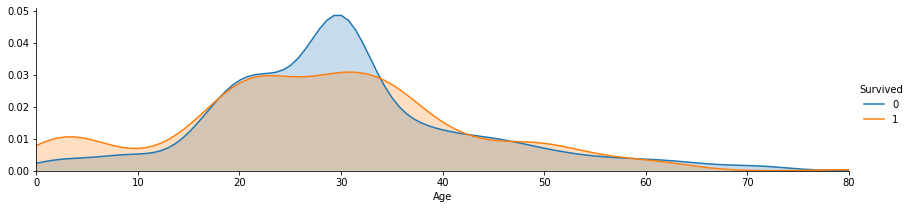

In [41]:
plt.figure(figsize= [20,40])
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0, 20)

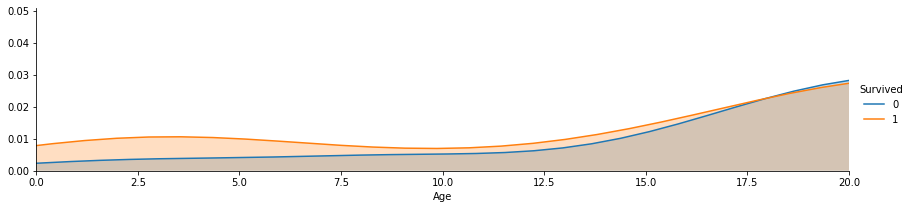

In [42]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(30, 40)

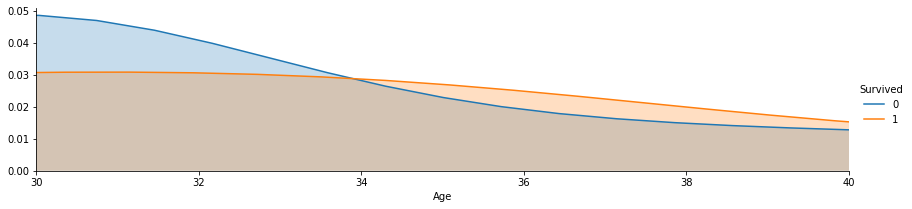

In [43]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

(40, 60)

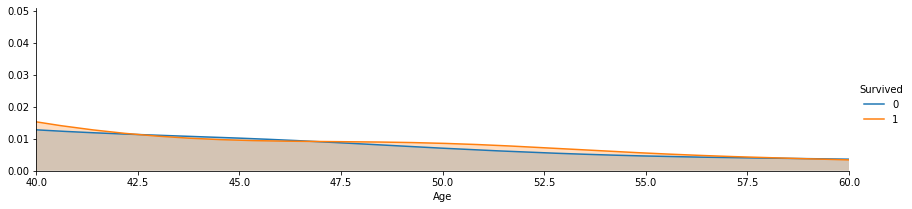

In [44]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60, 80.0)

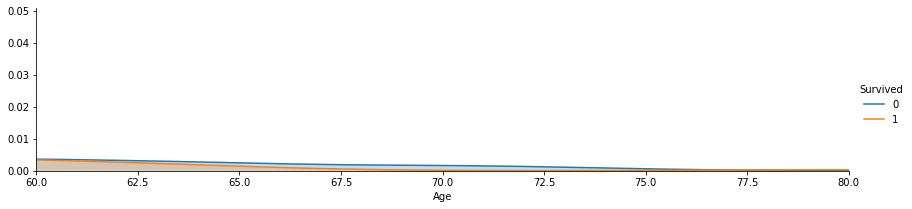

In [45]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [47]:
train.isnull().sum().sort_values(ascending = True)

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Title            2
Cabin          687
dtype: int64

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


## Binning

Binning/Converting NUmerical Age to Categorical Variable

<b>Feature Vector Map:</b>

Child: 0

Young: 1

Adult: 2

Mid-Age: 3

Senior: 4

In [49]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] >36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


In [51]:
def barplot(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

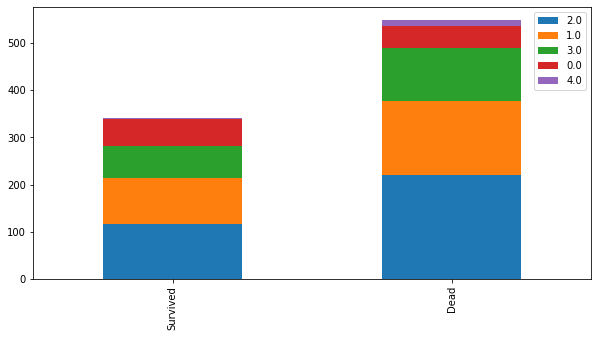

In [52]:
barplot('Age')

## Embarked

<b>filling missing values

Let's check out the relationship between <b>Embarked</b> and the <b>class of Ticket(Pclass)</b>

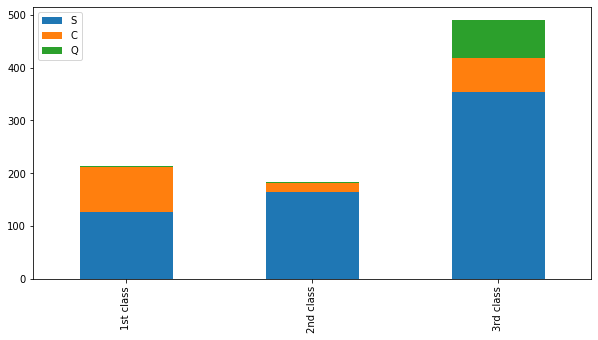

In [53]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()

Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()

Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])

df.index = ['1st class', '2nd class', '3rd class']

df.plot(kind= 'bar', stacked = True, figsize = (10,5))

more than 50% of 1st class are from S embark

more than 50% of 2nd class are from S embark

more than 50% of 3rd class are from S embark

In [54]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [55]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            2
dtype: int64

In [56]:
embarked_mapping = {'S': 0, 'C':1, 'Q':2,}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

# Fare

In [57]:
# fill missing Fare with median fare for each Pclass

train['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)

test['Fare'].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

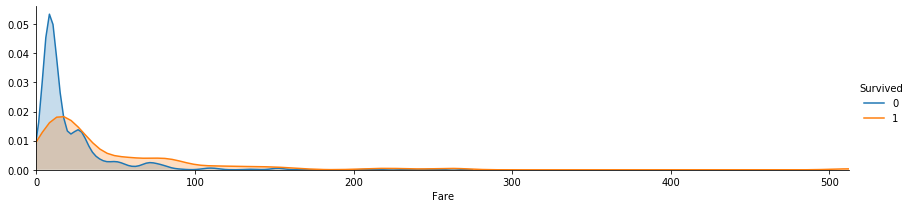

In [58]:
facet = sns.FacetGrid(train, hue ="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0, 20)

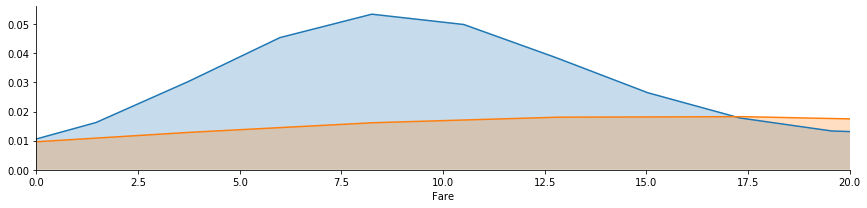

In [59]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim=(0, train['Fare'].max()))

plt.xlim(0,20)

(0, 30)

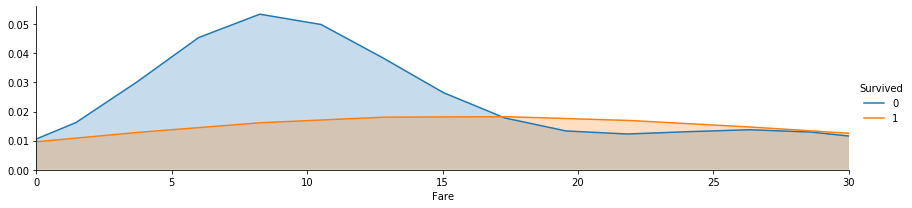

In [60]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect= 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0, 30)

(0, 512.3292)

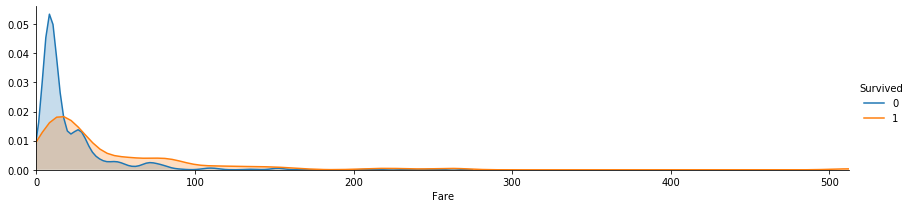

In [61]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0)

In [62]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

# Cabin

In [63]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
E101           3
              ..
C50            1
C87            1
A7             1
A14            1
B82 B84        1
Name: Cabin, Length: 147, dtype: int64

In [64]:
# Extracting the first letter

for dataset in train_test_data:
    dataset["Cabin"]= train['Cabin'].str[:1]

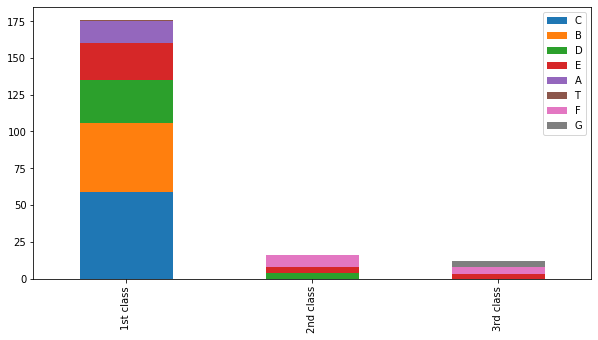

In [65]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()

Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()

Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])

df.index = ['1st class', '2nd class', '3rd class']

df.plot(kind = 'bar', stacked = True, figsize = (10,5))

In [66]:
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E':1.6, 'F':2, 'G':2.4, 'T':2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [67]:
# fill ,issing Fare with median fare for each Pclass

train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

## Family Size

In [68]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

(0, 11.0)

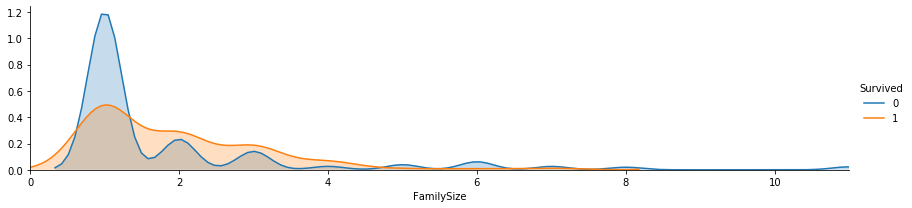

In [69]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

plt.xlim(0)

In [70]:
family_mapping = {1: 0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6: 2, 7: 2.4, 8: 2.8, 9:3.2, 10: 3.6, 11: 4}

for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [71]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [72]:
# Let's drop some features

features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)
train = train.drop(['PassengerId'], axis = 1)

In [73]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
Embarked      0
Title         2
FamilySize    0
dtype: int64

In [74]:
train['Title'] = train['Title'].fillna(0)

In [75]:
train['Title'].isnull().sum()

0

In [76]:
train_data = train.drop('Survived', axis =1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

# Modelling

In [77]:
# Importing classifier Modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    float64
 8   FamilySize  891 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 62.8 KB


## Cross Validation (K-fold)

In [79]:
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

## kNN

In [81]:
clf = KNeighborsClassifier(n_neighbors = 13)

scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs=1, scoring = scoring)

print(score)

[0.81111111 0.76404494 0.82022472 0.82022472 0.87640449 0.82022472
 0.85393258 0.79775281 0.85393258 0.83146067]


In [82]:
# kNN score

round(np.mean(score)*100,2)

82.49

## Decision Tree

In [83]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, target, cv=k_fold, n_jobs=1, scoring = scoring)

print(score)

[0.76666667 0.79775281 0.7752809  0.7752809  0.86516854 0.75280899
 0.83146067 0.82022472 0.74157303 0.79775281]


In [84]:
# decision tree score

round(np.mean(score)*100,2)

79.24

## Random Forest

In [85]:
clf = RandomForestClassifier(n_estimators=13)

scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)

[0.78888889 0.84269663 0.78651685 0.7752809  0.87640449 0.80898876
 0.82022472 0.80898876 0.76404494 0.79775281]


In [86]:
# Random Forest Score

round(np.mean(score)*100,2)

80.7

## Naive Bayes

In [87]:
clf = GaussianNB()

scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs= 1, scoring= scoring)

print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.79775281 0.86516854 0.83146067]


In [88]:
# NAive Bayes Score

round(np.mean(score)*100, 2)

78.67

## SVM

In [89]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.85393258]


In [90]:
round(np.mean(score)*100,2)

83.5

## Testing

In [91]:
clf = SVC()

clf.fit(train_data, target)

test_data = test.drop('PassengerId', axis = 1).copy()

prediction = clf.predict(test_data)

In [92]:
submission = pd.DataFrame({
    'PassengerId': test["PassengerId"],
    'Survived': prediction
})

submission.to_csv('submissionD.csv', index = False)